In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
import ast 
import torch

In [2]:
def test_val_extractor(file_name):    
    # get accuracy from sparsity.txt
    test_val_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 0:
                line = ast.literal_eval(line)
                test_val_accumulator = line
                
    # return list of test accuracy 
    return test_val_accumulator

In [3]:
def selectivity_val_extractor(file_name):
    selectivity_average = 0
    selectivity_std = 0
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 1:
                selectivity_average = ast.literal_eval(line)
            if i == 2:
                selectivity_std = ast.literal_eval(line)
    return selectivity_average, selectivity_std

In [4]:
def sparsity_val_extractor(file_name):
    sparsity_average = 0
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 1:
                sparsity_average = ast.literal_eval(line)
    return sparsity_average

In [5]:
def all_plotter(original_test, original_sparsity, original_selectivity, single_test, single_sparsity, single_selectivity, pair_test, pair_sparsity, pair_selectivity, fives_test, fives_sparsity, fives_selectivity, location='best'):
    fig, ax = plt.subplots(figsize=(7, 7))
    
    ax.plot(np.linspace(0.0, 30, num=30), original_test, label='original_test', c = 'salmon')
    ax.plot(np.linspace(0.0, 30, num=30), original_sparsity, label='original_sparsity', c = 'red')
    ax.plot(np.linspace(0.0, 30, num=30), original_selectivity, label='original_selectivity', c = 'darkred')
    
    ax.plot(np.linspace(0.0, 30, num=30), single_test, label='single_test', c='lime')
    ax.plot(np.linspace(0.0, 30, num=30), single_sparsity, label='single_sparsity', c='green')
    ax.plot(np.linspace(0.0, 30, num=30), single_selectivity, label='single_selectivity', c='darkgreen')
    
    ax.plot(np.linspace(0.0, 30, num=30), pair_test, label='pair_test', c='blue')
    ax.plot(np.linspace(0.0, 30, num=30), pair_sparsity, label='pair_sparsity', c='mediumblue')
    ax.plot(np.linspace(0.0, 30, num=30), pair_selectivity, label='pair_selectivity', c='darkblue')
    
    ax.plot(np.linspace(0.0, 30, num=30), fives_test, label='fives_test', c='yellow')
    ax.plot(np.linspace(0.0, 30, num=30), fives_sparsity, label='fives_sparsity', c='goldenrod')
    ax.plot(np.linspace(0.0, 30, num=30), fives_selectivity, label='fives_selectivity', c='darkgoldenrod')
    
    ax.set_ylim([-0.2,1.2])
    ax.grid()
    ax.legend(bbox_to_anchor=(1, 0.5))
    plt.show()

# Graph format

In [6]:
def plotter(optimizer_name, flag=False): 
    ori_ta = test_val_extractor(f"original/sparsity_4_optim_{optimizer_name}.txt")
    ori_sparsity = sparsity_val_extractor(f"original/sparsity_4_optim_{optimizer_name}.txt")
    ori_selectivity_avg, ori_selectivity_std = selectivity_val_extractor(f"original/selectivity_4_optim_{optimizer_name}.txt")

    single_ta = test_val_extractor(f"single/sparsity_4_optim_single_{optimizer_name}.txt")
    single_sparsity = sparsity_val_extractor(f"single/sparsity_4_optim_single_{optimizer_name}.txt")
    single_selectivity_avg, single_selectivity_std = selectivity_val_extractor(f"single/selectivity_4_optim_single_{optimizer_name}.txt")

    pair_ta = test_val_extractor(f"pair/sparsity_4_optim_pair_{optimizer_name}.txt")
    pair_sparsity = sparsity_val_extractor(f"pair/sparsity_4_optim_pair_{optimizer_name}.txt")
    pair_selectivity_avg, pair_selectivity_std = selectivity_val_extractor(f"pair/selectivity_4_optim_pair_{optimizer_name}.txt")
    
    fives_ta = test_val_extractor(f"5s/sparsity_4_optim_5_nums_{optimizer_name}.txt")
    fives_sparsity = sparsity_val_extractor(f"5s/sparsity_4_optim_5_nums_{optimizer_name}.txt")
    fives_selectivity_avg, fives_selectivity_std = selectivity_val_extractor(f"5s/selectivity_4_optim_5_nums_{optimizer_name}.txt")
    
    
    
    if flag==False:
        all_plotter(ori_ta, ori_sparsity, ori_selectivity_avg, single_ta, single_sparsity, single_selectivity_avg, pair_ta, pair_sparsity, pair_selectivity_avg, fives_ta, fives_sparsity, fives_selectivity_avg)
    else:
        return ori_ta, ori_sparsity, ori_selectivity_avg, ori_selectivity_std, single_ta, single_sparsity, single_selectivity_avg, single_selectivity_std, pair_ta, pair_sparsity, pair_selectivity_avg, pair_selectivity_std, fives_ta, fives_sparsity, fives_selectivity_avg, fives_selectivity_std

In [7]:
ori_ta_sgd,      ori_sparsity_sgd,      ori_selectivity_avg_sgd,      ori_selectivity_std_sgd,      single_ta_sgd,      single_sparsity_sgd,      single_selectivity_avg_sgd,      single_selectivity_std_sgd,      pair_ta_sgd,      pair_sparsity_sgd,      pair_selectivity_avg_sgd,      pair_selectivity_std_sgd,      fives_ta_sgd,      fives_sparsity_sgd,      fives_selectivity_avg_sgd,      fives_selectivity_std_sgd = plotter('SGD', flag=True)
ori_ta_adadelta, ori_sparsity_adadelta, ori_selectivity_avg_adadelta, ori_selectivity_std_adadelta, single_ta_adadelta, single_sparsity_adadelta, single_selectivity_avg_adadelta, single_selectivity_std_adadelta, pair_ta_adadelta, pair_sparsity_adadelta, pair_selectivity_avg_adadelta, pair_selectivity_std_adadelta, fives_ta_adadelta, fives_sparsity_adadelta, fives_selectivity_avg_adadelta, fives_selectivity_std_adadelta = plotter('Adadelta', flag=True)
ori_ta_adagrad,  ori_sparsity_adagrad,  ori_selectivity_avg_adagrad,  ori_selectivity_std_adagrad,  single_ta_adagrad,  single_sparsity_adagrad,  single_selectivity_avg_adagrad,  single_selectivity_std_adagrad,  pair_ta_adagrad,  pair_sparsity_adagrad,  pair_selectivity_avg_adagrad,  pair_selectivity_std_adagrad,  fives_ta_adagrad,  fives_sparsity_adagrad,  fives_selectivity_avg_adagrad,  fives_selectivity_std_adagrad = plotter('Adagrad', flag=True)
ori_ta_adam,     ori_sparsity_adam,     ori_selectivity_avg_adam,     ori_selectivity_std_adam,     single_ta_adam,     single_sparsity_adam,     single_selectivity_avg_adam,     single_selectivity_std_adam,     pair_ta_adam,     pair_sparsity_adam,     pair_selectivity_avg_adam,     pair_selectivity_std_adam,     fives_ta_adam,     fives_sparsity_adam,     fives_selectivity_avg_adam,     fives_selectivity_std_adam = plotter('Adam', flag=True)

# Subplots

In [18]:
def suplots(ori_sgd, ori_adadelta, ori_adagrad, ori_adam,
            single_sgd, single_adadelta, single_adagrad, single_adam,
            pair_sgd, pair_adadelta, pair_adagrad, pair_adam,
            fives_sgd, fives_adadelta, fives_adagrad, fives_adam):
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,15))
    
    ax1.plot(np.linspace(0, 30, 30), ori_sgd, label='SGD ori', c='red')
    ax1.plot(np.linspace(0, 30, 30), ori_adadelta, label='Adadelta ori', c='blue')
    ax1.plot(np.linspace(0, 30, 30), ori_adagrad, label='Adagrad ori', c='green')
    ax1.plot(np.linspace(0, 30, 30), ori_adam, label='Adam ori', c='violet')
    ax1.set_ylim([-0.1,1.1])
    ax1.set_title('Random (Original)')
    ax1.grid()
    ax1.legend(loc='best')
    
    ax4.plot(np.linspace(0, 30, 30), single_sgd, label='SGD single', c='red')
    ax4.plot(np.linspace(0, 30, 30), single_adadelta, label='Adadelta single', c='blue')
    ax4.plot(np.linspace(0, 30, 30), single_adagrad, label='Adagrad single', c='green')
    ax4.plot(np.linspace(0, 30, 30), single_adam, label='Adam single', c='violet')
    ax4.set_ylim([-0.1,1.1])
    ax4.set_title('Single')
    ax4.grid()
    ax4.legend(loc='best')
    
    ax3.plot(np.linspace(0, 30, 30), pair_sgd, label='SGD pair', c='red')
    ax3.plot(np.linspace(0, 30, 30), pair_adadelta, label='Adadelta pair', c='blue')
    ax3.plot(np.linspace(0, 30, 30), pair_adagrad, label='Adagrad pair', c='green')
    ax3.plot(np.linspace(0, 30, 30), pair_adam, label='Adam pair', c='violet')
    ax3.set_ylim([-0.1,1.1])
    ax3.set_title('Pair')
    ax3.grid()
    ax3.legend(loc='best')
    
    ax2.plot(np.linspace(0, 30, 30), fives_sgd, label='SGD fives', c='red')
    ax2.plot(np.linspace(0, 30, 30), fives_adadelta, label='Adadelta fives', c='blue')
    ax2.plot(np.linspace(0, 30, 30), fives_adagrad, label='Adagrad fives', c='green')
    ax2.plot(np.linspace(0, 30, 30), fives_adam, label='Adam fives', c='violet')
    ax2.set_ylim([-0.1,1.1])
    ax2.set_title('5s')
    ax2.grid()
    ax2.legend(loc='best')
    
    plt.show()

# Compare

In [19]:
def compare(optimizer_name, flag=True):
    print(f'\n==============={optimizer_name}===============')
    ori_ta, ori_sparsity, ori_selectivity_avg, ori_selectivity_std, single_ta, single_sparsity, single_selectivity_avg, single_selectivity_std, pair_ta, pair_sparsity, pair_selectivity_avg, pair_selectivity_std, _, _, _, _ = plotter(optimizer_name, flag=True)
    print(f"{optimizer_name} original: Test acc={ori_ta[-1]:.3f}, Spar={ori_sparsity[-1]:.3f}, Selec avg={ori_selectivity_avg[-1]:.3f}, Selec std={ori_selectivity_std[-1]:.3f}")
    print(f"{optimizer_name} single: Test acc={single_ta[-1]:.3f}, Spar={single_sparsity[-1]:.3f}, Selec avg={single_selectivity_avg[-1]:.3f}, Selec std={single_selectivity_std[-1]:.3f}")
    print(f"{optimizer_name} pair: Test acc={pair_ta[-1]:.3f}, Spar={pair_sparsity[-1]:.3f}, Selec avg={pair_selectivity_avg[-1]:.3f}, Selec std={pair_selectivity_std[-1]:.3f}")
    print()
    print("< Compare with single >")
    print()
    print("test deviation: single - original:", single_ta[-1] - ori_ta[-1])
    print("sparsity deviation: single - original:", single_sparsity[-1] - ori_sparsity[-1])
    print("selectivity deviation: single - original:", single_selectivity_avg[-1] - ori_selectivity_avg[-1])
    print()
    print("test % difference: sorted / original:", (single_ta[-1] / ori_ta[-1]) * 100)
    print("sparsity % difference: sorted / original:", (single_sparsity[-1] / ori_sparsity[-1]) * 100)
    print("selectivity % difference: sorted / original:", (single_selectivity_avg[-1] / ori_selectivity_avg[-1]) * 100)
    print()
    print("< Compare with pair >")
    print()
    print("test deviation: pair - original:", pair_ta[-1] - ori_ta[-1])
    print("sparsity deviation: pair - original:", pair_sparsity[-1] - ori_sparsity[-1])
    print("selectivity deviation: pair - original:", pair_selectivity_avg[-1] - ori_selectivity_avg[-1])
    print()
    print("test % difference: pair / original:", (pair_ta[-1] / ori_ta[-1]) * 100)
    print("sparsity % difference: pair / original:", (pair_sparsity[-1] / ori_sparsity[-1]) * 100)
    print("selectivity % difference: pair / original:", (pair_selectivity_avg[-1] / ori_selectivity_avg[-1]) * 100)
    print()
    

In [20]:
# need to add fives
compare('SGD')
compare('Adadelta')
compare('Adagrad')
compare('Adam')


===============SGD===============
SGD original: Test acc=0.971, Spar=0.222, Selec avg=0.320, Selec std=0.174
SGD single: Test acc=0.957, Spar=0.426, Selec avg=0.514, Selec std=0.146
SGD pair: Test acc=0.962, Spar=0.358, Selec avg=0.477, Selec std=0.152

< Compare with single >

test deviation: single - original: -0.014000000000000012
sparsity deviation: single - original: 0.20330238342285156
selectivity deviation: single - original: 0.19389655473441758

test % difference: sorted / original: 98.5583359077335
sparsity % difference: sorted / original: 191.42972330218885
selectivity % difference: sorted / original: 160.60539511088015

< Compare with pair >

test deviation: pair - original: -0.009000000000000008
sparsity deviation: pair - original: 0.13566100597381592
selectivity deviation: pair - original: 0.15660545656539898

test % difference: pair / original: 99.07321594068583
sparsity % difference: pair / original: 161.0098515829225
selectivity % difference: pair / original: 148.94948

# subplots - test: original vs single

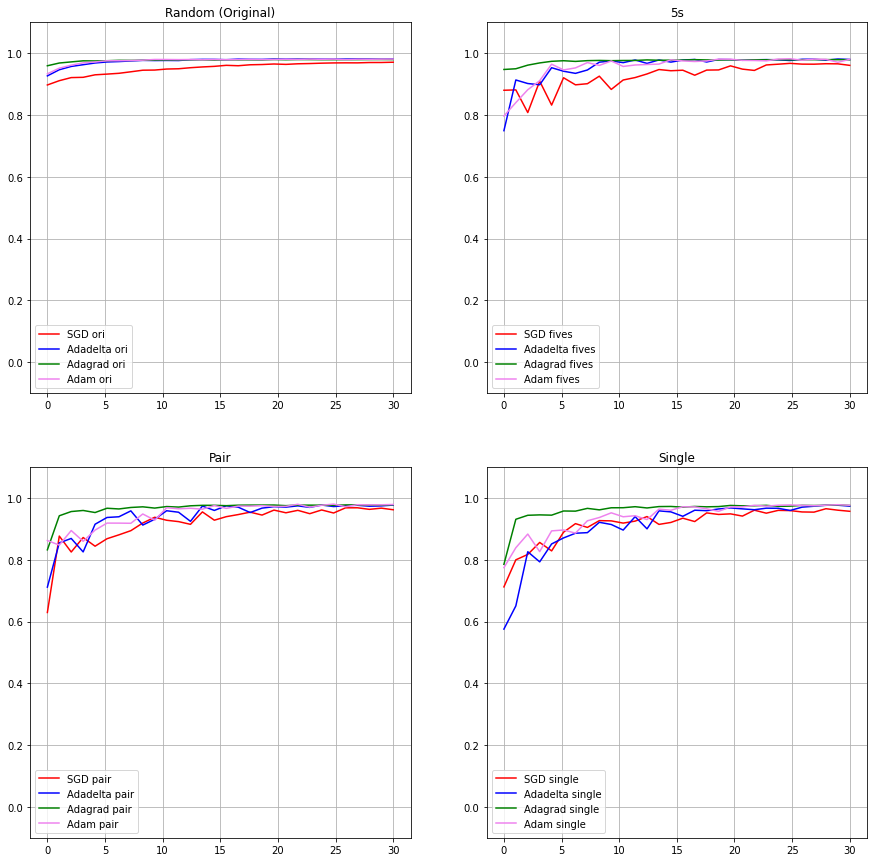

In [21]:
suplots(ori_ta_sgd, ori_ta_adadelta, ori_ta_adagrad, ori_ta_adam,
        single_ta_sgd, single_ta_adadelta, single_ta_adagrad, single_ta_adam,
        pair_ta_sgd, pair_ta_adadelta, pair_ta_adagrad, pair_ta_adam,
        fives_ta_sgd, fives_ta_adadelta, fives_ta_adagrad, fives_ta_adam,
        )

# subplots - sparsity

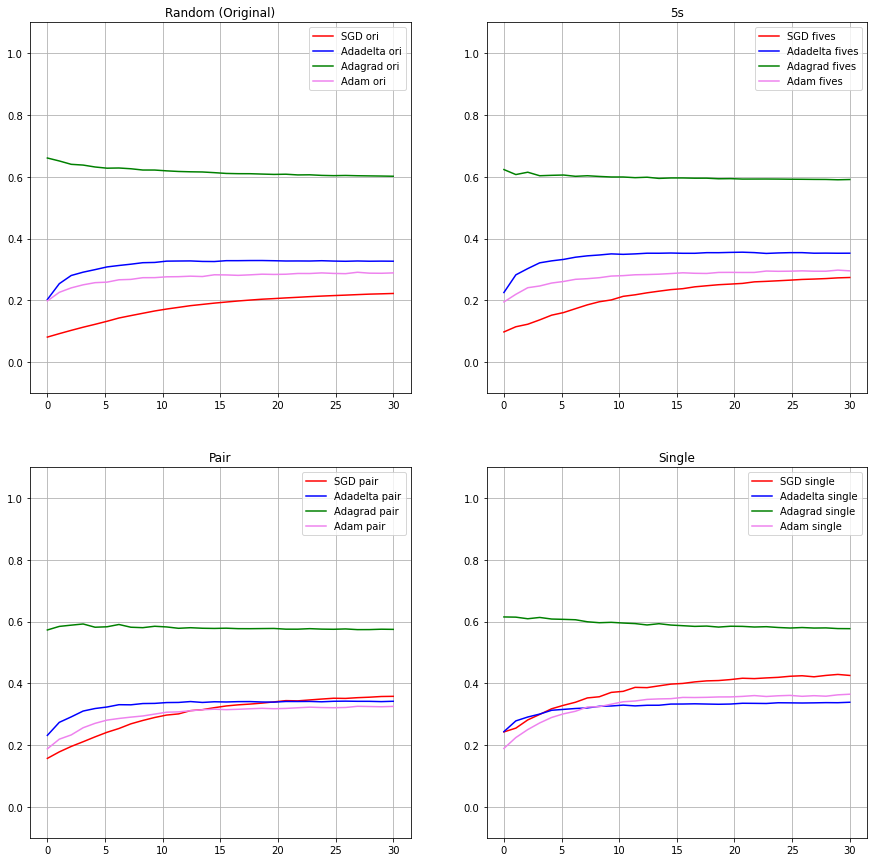

In [22]:
suplots(ori_sparsity_sgd, ori_sparsity_adadelta, ori_sparsity_adagrad, ori_sparsity_adam,
        single_sparsity_sgd, single_sparsity_adadelta, single_sparsity_adagrad, single_sparsity_adam,
        pair_sparsity_sgd, pair_sparsity_adadelta, pair_sparsity_adagrad, pair_sparsity_adam,
        fives_sparsity_sgd, fives_sparsity_adadelta, fives_sparsity_adagrad, fives_sparsity_adam,
        )

# subplots - selectivity

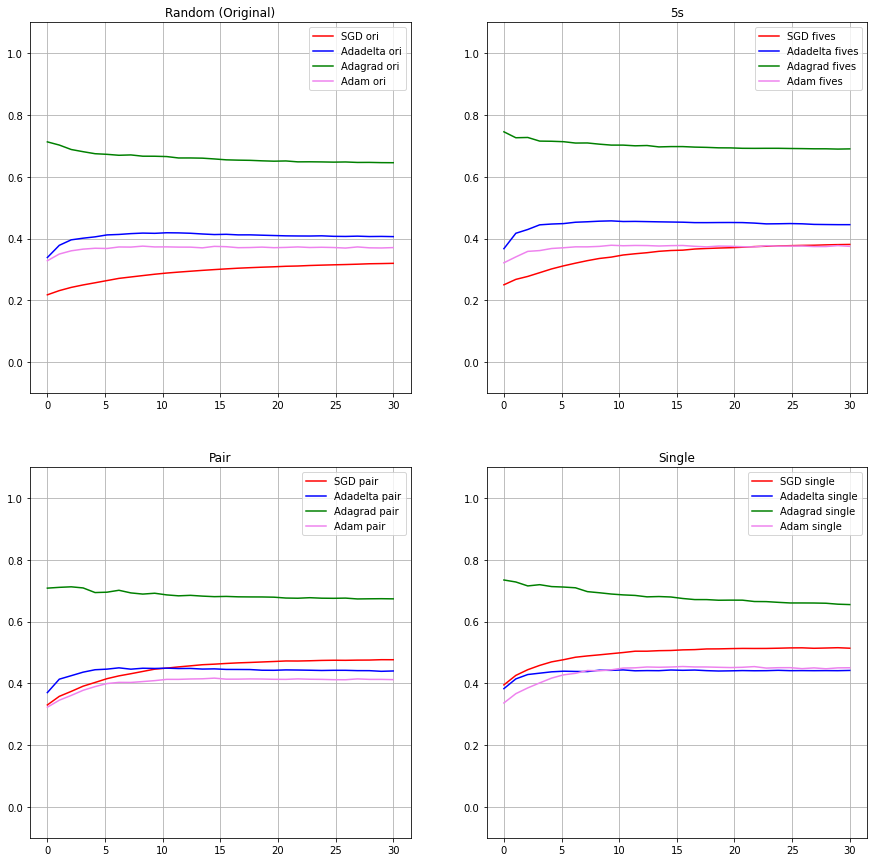

In [23]:
suplots(ori_selectivity_avg_sgd, ori_selectivity_avg_adadelta, ori_selectivity_avg_adagrad, ori_selectivity_avg_adam,
        single_selectivity_avg_sgd, single_selectivity_avg_adadelta, single_selectivity_avg_adagrad, single_selectivity_avg_adam,
        pair_selectivity_avg_sgd, pair_selectivity_avg_adadelta, pair_selectivity_avg_adagrad, pair_selectivity_avg_adam,
        fives_selectivity_avg_sgd, fives_selectivity_avg_adadelta, fives_selectivity_avg_adagrad, fives_selectivity_avg_adam,
        )

# SGD

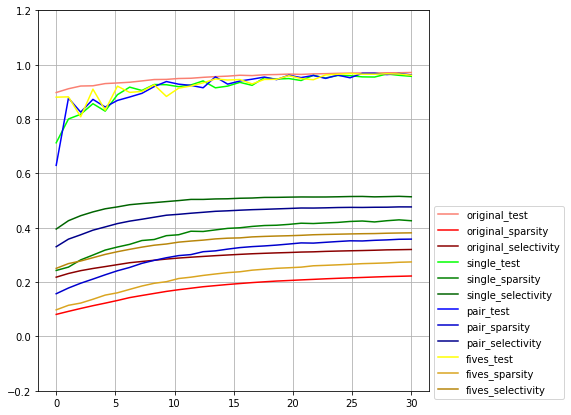

In [24]:
plotter('SGD')

# Adadelta

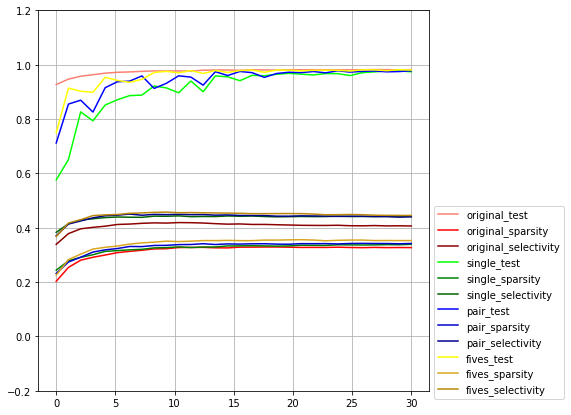

In [25]:
plotter('Adadelta')

# Adagrad

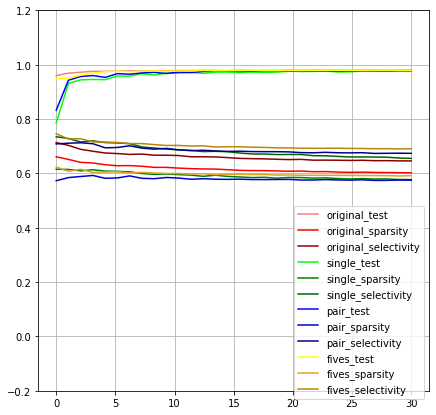

In [16]:
plotter('Adagrad')

# Adam

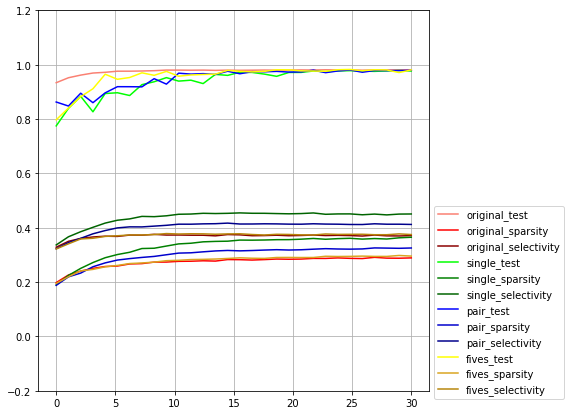

In [17]:
plotter('Adam')